# Introduction to Hidden Markov models


### Markov chain

A Markov chain is a sequence of states $S_{1:T}=\left(S_{1},...,S_{T}\right)$ that has the $\textit{Markov property}$:

$$P\left(S_{t}|S_{1:(t-1)}\right)= P\left(S_{t}|S_{t-1}\right) \; \text{first-order Markov chain}$$

$$P\left(S_{t}|S_{1:(t-1)}\right)= P\left(S_{t}|S_{(t-n):(t-1)}\right) \; \text{n-order Markov chain}$$

#### Transition matrix

The evolution of states in discrete Markov model is fully characterized by transition probability matrix $A(t)$:

$$A(t)=\begin{pmatrix}
a_{11}(t) & a_{12}(t) &...& a_{1N}(t)\\
a_{21}(t) & a_{22}(t) &...& a_{2N}(t)\\
\vdots & \vdots & \ddots &\vdots\\
a_{N1}(t) & a_{N2}(t) &...& a_{NN}(t)
\end{pmatrix}$$

with $a_{ij}(t)=P\left(S_{t}=j|S_{t-1}=i\right)$ and the following constraints: $\sum_{j=1}^{N}a_{ij}(t)=1 \; \forall t, i$.

#### Homogeneity

A Markov chain is called $\textit{homogeneous}$ if the transition probabilities do not depend on $t$.

#### Initial state probabilities 
The initial state probabilities are the probabilities of the Markov process starting in a given state that are denoted by $\pi=\left(\pi_{1},\pi_{2},...,\pi_{2}\right)$ with
$$ \pi_{i}=P\left(S_{1}=i\right), \; i=1,...,N.$$

The transition probabilities $A(t)$ and the initial state probabilities together fully define the markov model.

#### Chapman-Kolmogorov Equations
We call $A^{(s)}$ the s-step transition matrix with $a_{ij}^{(s)}=P\left(S_{t+s}=j|S_{t}=i\right)$. Then 
$$ A^{(m+n)}=A^{(m)}A^{(n)}$$
which is the same as $a_{ij}^{(m+n)}=\sum_{k=1}^{N} a_{ik}^{(m)}a_{kj}^{(n)}$
We have then
$$A^{(s)}=A^{(s-1)}A^{1}$$
$$A^{(s)}=A^{(s-2)}A^{2}$$
$$\vdots$$
$$A^{(s)}=A A^{s-1}=A^{s}$$

In [ ]:
trm <- matrix(c(0.8,0.2,0.4,0.6),nrow=2,byrow=TRUE)
init <- matrix(c(0.2,0.8),nrow=1)
trm2 <- trm%*%trm 
trm4 <- trm2%*%trm2
trm6 <- trm4%*%trm2
print(trm)
print(trm2)
print(trm4)
print(trm6)

     [,1] [,2]
[1,]  0.8  0.2
[2,]  0.4  0.6
     [,1] [,2]
[1,] 0.72 0.28
[2,] 0.56 0.44
       [,1]   [,2]
[1,] 0.6752 0.3248
[2,] 0.6496 0.3504
         [,1]     [,2]
[1,] 0.668032 0.331968
[2,] 0.663936 0.336064


The rows started to converge toward the stationary distribution.

#### Stationary Distribution
The $\textit{stationary distribution}$ of a Markov chain  is computed as the normalized left eigenvector of the transition matrix:
$$p=p.A$$

In [ ]:
stationary <- function(tpm) {
   e1 <- eigen(t(tpm))$vectors[,1]
return(e1/sum(e1))}
stationary(trm)

[1] 0.6666667 0.3333333

#### Ergodicity 
An $\textit{ergodic Markov model}$ is aperiodic and irreducible. 
An irreducible Markov model is a model in which all the states of the model are reachable in a finite number of steps from all the other states:

$$\forall i,j, \exists s < \infty \, s.t \, a_{ij}^{(s)}>0, $$

A periodic state of a Markov model is a state that can only be returned to after a certain number of steps $j > 1$

For ergodic Markov models the s-step transition matrix converges to a matrix with its rows equal to the stationary distribution. This is true regardless of the starting distribution. 

### Hidden Markov Models 
 A $\textit{hidden Markov model}$ is characterized by unobserved states $S_{1:T}$, i.e. hidden, that are assumed to “produce” a sequence of observable responses $Y_{1:T}$. The joint distribution of observations and hidden states is expressed as: 
 $$ f\left(Y_{1:T}, S_{1:T}\right)=P\left(S_{1}\right)f\left(Y_{1}|S_{1}\right)\times \prod_{t=2}^{T} P\left(S_{t}|S_{t-1}\right)f\left(Y_{t}|S_{t}\right) \; (1)$$         

The probability density functions $f$ and probability distribution function $P$ generally depend on parameters $\theta$ as follow:

1. $\textit{Prior model:}$ A model of $P\left(S_{1}|\theta_{pr}\right)$.
2. $\textit{Transition model:}$ A model of  $P\left(S_{t}|\theta_{tr}, S_{t-1}\right)$.
3. $\textit{Observation model:}$ A model of $P\left(Y_{t}|\theta_{obs}, S_{t}\right)$.

#### Example: Bernoulli Hidden Markov Model
Consider a two-state hidden Markov model with binary observations. The responses in one state are produced by a fair coin, generating equal numbers of heads and tails ($P\left(Y=0|S=1\right)=0.5$), whereas the responses in the second state stem from a biased coin that produces almost only tails ( $P\left(Y=0|S=2\right)=0.05$).

In [ ]:
set.seed(2)
y1 <- sample(c(0,1),10,c(0.5,0.5),replace=T)
y2 <- sample(c(0,1),10,c(0.05,0.95),replace=T)
y <- factor(c(y1,y2))
print(y)

 [1] 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1
Levels: 0 1


#### Likelihood and Inference Problems
The joint probability of observations and latent states of (1) is now conditioned on the model parameters $\theta = (\theta_{pr}, \theta_{tr}, \theta_{obs})$:
 $$ f\left(Y_{1:T}, S_{1:T}| \theta \right)=P\left(S_{1} | \theta_{pr}\right)f\left(Y_{1}|S_{1}, \theta_{obs}\right)\times \prod_{t=2}^{T} P\left(S_{t}|S_{t-1}, \theta_{tr}\right)f\left(Y_{t}|S_{t}, \theta_{obs}\right)$$         

The likelihood function can be written as:
 $$ L\left(\theta|y_{1:T}\right)=\sum_{s_{1:T}\in \mathcal{S}^{T}}f\left(y_{1:T}, s_{1:T}| \theta \right)$$
 
 The summation over all possible state sequences quickly becomes unfeasible.

### Filtering, Likelihood, Smoothing and Prediction
The inference of the hidden state sequence can be done from: 
1. The filtering probability: $P\left(S_{t}|Y_{1:t}\right)$
1. The smoothing probability: $P\left(S_{t}|Y_{1:T}\right)$

For any time point $t = 1, . . . , T$ , we can write the posterior distribution of the state sequence up to that time, given the data observed up to that time, as:
$$P\left(S_{1:t}|Y_{1:t}\right)=\frac{f\left(S_{1:t},Y_{1:t}\right)}{f\left(Y_{1:t}\right)}=\frac{f\left(S_{1:(t-1)},Y_{1:(t-1)}\right)}{f\left(Y_{1:(t-1)}\right)} \frac{f\left(S_{t},Y_{t}|S_{1:(t-1)},Y_{1:(t-1)}\right)}{f\left(Y_{t}|Y_{1:(t-1)}\right)}$$
$$=P\left(S_{1:(t-1)}|Y_{1:(t-1)}\right)\frac{P\left(S_{t}|S_{t-1}\right)f\left(Y_{t}|S_{t}\right)}{f\left(Y_{t}|Y_{1:(t-1)}\right)}$$

The $\textit{observation-prediction distribution}$ can be defined as:
$$f\left(Y_{t}|Y_{1:(t-1)}\right)=\sum_{i=1}^{N}P\left(S_{t}=i|Y_{1:(t-1)}\right)f\left(Y_{t}|S_{t}=i\right)$$
and $\textit{state-prediction distribution}$ is given by: 
$$P\left(S_{t}=i|Y_{1:(t-1)}\right)=\sum_{j=1}^{N}P\left(S_{t-1}=j|Y_{1:(t-1)}\right)P\left(S_{t}=i|S_{t-1}=j\right)$$


#### Filtering 
The filtering distribution plays a central role in HMM theory. 
$$P\left(S_{t}=i|Y_{1:t}\right)=\frac{f\left(Y_{1:t}, S_{t}=i\right)}{\sum_{j=1}^{N}f\left(Y_{1:t}, S_{t}=j\right)}=\frac{\alpha_{t}(i)}{\sum_{j=1}^{N}\alpha_{t}(j)}$$


we define so-called $\textit{forward variable}$ as 
$$ \alpha_{t}(i)=f\left(Y_{1:t}, S_{t}=i\right)$$
Iteratively
$$ \alpha_{1}(i)=P\left(S_{1}=i\right)f\left(Y_{1}|S_{1}=i\right)$$
At time $t>0$, we have 
$$\alpha_{t}(i)=\sum_{j=1}^{N} f\left( Y_{1:(t-1)}, Y_{t}, S_{t-1}=j, S_{t}=i\right)$$
      $$  =\sum_{j=1}^{N} f\left(Y_{1:(t-1)},S_{t-1}=j\right)P\left(Y_{t}, S_{t}=i|S_{t-1}=j\right)$$
      $$  =\sum_{j=1}^{N} \alpha_{t-1}(j) P\left(S_{t}=i|S_{t-1}=j\right) P\left(Y_{t}|S_{t}=i\right)$$

#### Example 
The data were gathered at a primary school in Amsterdam where children learned to discriminate between pairs of presented objects. The objects were black or white triangles or circles. Children had to learn which dimension, shape or color, was relevant to discriminate rewarded from non-rewarded objects.

$\textit{Research Questions}$
The main questions of interest for this data concern the nature of the learning process: is it a gradual or an all-or-none process? Is there heterogeneity among participants in their strategy and speed of learning?


The all-or-none model we will use here is characterized by two states:
1. A guessing state (where the probability of a correct answer is exactly .5).
2. A mastery state, where the probability of a correct answer is exactly 1. 
3. We will assume $P(S_{t+1} = 2|S_{t} = 1) = 0.2$. 
4. Finally, we will assume that people always start in a guessing state, so $P(S_{1} = 1) = 1$.

     [,1] [,2]
[1,]  0.8  0.2
[2,]  0.0  1.0
      [,1] [,2]
 [1,]  0.5    0
 [2,]  0.5    1
 [3,]  0.5    1
 [4,]  0.5    1
 [5,]  0.5    0
 [6,]  0.5    1
 [7,]  0.5    1
 [8,]  0.5    1
 [9,]  0.5    1
[10,]  0.5    1
[11,]  0.5    1
 [1] incorrect correct   correct   correct   incorrect correct   correct  
 [8] correct   correct   correct   correct  
Levels: incorrect correct


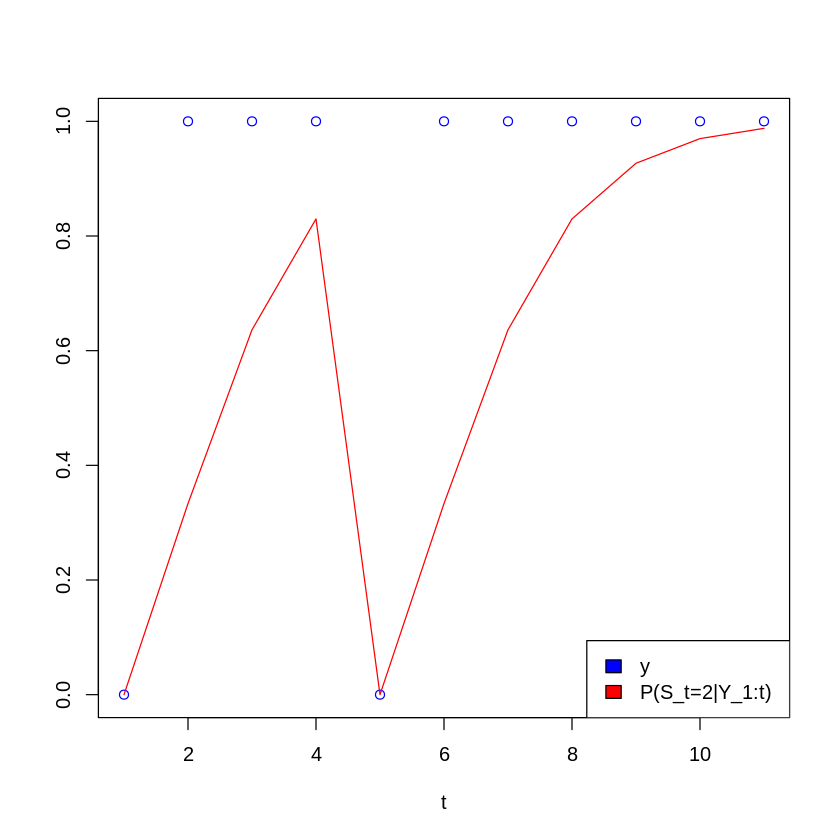

In [ ]:
#install.packages("hmmr")
library(hmmr)
data(discrimination)
y <- discrimination$acc[1795:1805]
nt <- length(y)
prior <- c(1,0) # prior probabilities
A <- matrix(c(.8,0,0.2,1),ncol=2) # transition matrix
print(A)
B <- cbind(rep(.5,nt),as.numeric(y == "correct")) # obs dens 
print(B)
alpha <- matrix(ncol=2,nrow=nt)
alpha[1,] <- prior*B[1,] # initialize
for(t in 2:nt) {
   alpha[t,] <- (t(A)%*%alpha[t-1,])*B[t,] # recursion
}
filtering_proba <- alpha/rowSums(alpha)
print(y)
##Plot####
y_ <- as.numeric(y == "correct")
plot( c(1:11), y_, xlab="t", col="blue", ylab="")
lines(c(1:11),filtering_proba[,2],col="red", type="l")
legend("bottomright",
       c("y","P(S_t=2|Y_1:t)"),
       fill=c("blue","red"))
##########

#### Likelihood
We cab use the forward variables to comupte the likelihood at time T: 
 $$ L\left(\theta|y_{1:T}\right)=\sum_{i=1}^{N}f\left(y_{1:T}, S_{T}=i| \theta \right)= \sum_{i=1}^{N} \alpha_{T}(i)$$




In [ ]:
sum(alpha[nt,])

[1] 0.004301619

#### Smoothing 
$$P\left(S_{t}=i|Y_{1:T}\right)=\frac{f\left(Y_{1:T}, S_{t}=i\right)}{f\left(Y_{1:T}\right)}$$
$$ =\frac{f\left(Y_{1:t}, S_{t}=i\right)f\left(Y_{(t+1):T}| S_{t}=i\right)}{\sum_{j=1}^{N}f\left(Y_{1:t}, S_{t}=j\right)f\left(Y_{(t+1):T}| S_{t}=j\right)}$$
$$=\frac{\alpha_{t}(i)\beta_{t}(i)}{\sum_{j=1}^{N}\alpha_{t}(j)\beta_{t}(j)}= \gamma_{t}(i)$$

we define the $\textit{backward variable}$ as 
$$\beta_{t}(i)=f\left(Y_{(t+1):T}| S_{t}=i\right)$$


The backward variable is initialized at $t=T$:
$\beta_{T}(i)=1, \, i=1,...,N$
For each $T=T-1,...,1$, we compute: 
$$\beta_{t}(i)=\sum_{j=1}^{N}f\left(Y_{t+1},Y_{(t+2):T}, S_{t+1}=j|S_{t}=i\right)$$
=$$\sum_{j=1}^{N}f\left(Y_{t+1}, S_{t+1}=j|S_{t}=i\right)f\left(Y_{(t+2):T}|S_{t+1}=j\right)$$
=$$\sum_{j=1}^{N}P\left(S_{t+1}=j|S_{t}=i\right)f\left(Y_{t+1}|S_{t+1}=j\right)\beta_{t+1}(j)$$

In [ ]:
beta <- matrix(ncol=2,nrow=nt)
beta[nt,] <- 1 # initialize
for(t in (nt-1):1) {
beta[t,] <- (A%*%(B[t+1,]*beta[t+1,])) # recursion 
}

Smoothing_proba <- alpha*beta/rowSums(alpha*beta)


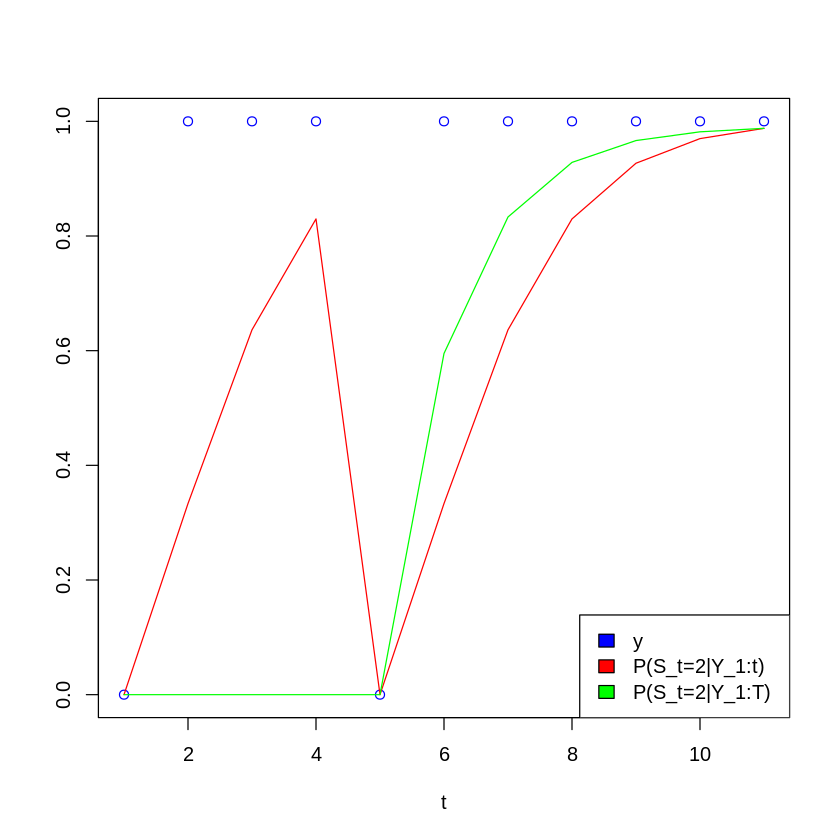

In [ ]:
##Plot####
y_ <- as.numeric(y == "correct")
plot( c(1:11), y_, xlab="t", col="blue", ylab="")
lines(c(1:11),filtering_proba[,2],col="red", type="l")
lines(c(1:11),Smoothing_proba[,2],col="green", type="l")
legend("bottomright",
       c("y","P(S_t=2|Y_1:t)", "P(S_t=2|Y_1:T)"),
       fill=c("blue","red", "green"))
##########

Compared to the filtering probabilities, we can see that the smoothing probabilities remain at 0 on all trials where a later response is incorrect. This is as it should be, because in this version of the all-or-none model, mistakes are impossible when in the mastery state, and transitions from the mastery state back to the guessing state are also impossible. This makes sense, as the smoothing distribution incorporates the knowledge that no further incorrect answers were given, while the filtering distribution does not take future observations into account.

#### Scaling
A practical problem with calculating the forward variables is that these become smaller and smaller, and for large t will be beyond the $\textbf{numerical precision of a computer}$. The backwards variables suffer from similar issues for long series.

In the HMM literature, we use a procedure based on scaled factors. 
$$\tilde{\alpha}_{t}(i)=\frac{\alpha_{t}(i)}{\sum_{j=1}^{N}\alpha_{t}(j)}=P\left(S_{t}=i|Y_{1:t}\right)=c_{t}\alpha_{t}(i)$$
$$c_{t}=\frac{1}{\sum_{j=1}^{N}\alpha_{t}(j)}=\frac{1}{f\left(Y_{1:t}\right)}$$

Similar to the unscaled version, the scaled forward variables can be computed recursively as 
$$\tilde{\alpha}_{t}(i)=\tilde{c}_{t}\sum_{j=1}^{N} \tilde{\alpha}_{t-1}(j) P\left(S_{t}=i|S_{t-1}=j\right) f\left(Y_{t}|S_{t}=i\right)$$
with scaling factor 
$$\tilde{c}_{t}=\frac{1}{\sum_{i=1}^{N}\sum_{j=1}^{N} \tilde{\alpha}_{t-1}(j) P\left(S_{t}=i|S_{t-1}=j\right) f\left(Y_{t}|S_{t}=i\right)}=\frac{1}{f\left(Y_{t}|Y_{1:(t-1)}\right)}$$
It's easy to proof that 
$$c_{t}=\prod_{u=1}^{t} \tilde{c}_{u}$$

In [ ]:
scaled_alpha <- matrix(ncol=2,nrow=nt)
ct <- vector(length=nt)
scaled_alpha[1,] <- prior*B[1,] # initialize
ct[1] <- 1/sum(scaled_alpha[1,]) # scaling factor
scaled_alpha[1,] <- ct[1]*scaled_alpha[1,] # rescale 
for(t in 1:(nt-1)) { # recursion:
      scaled_alpha[t+1,] <- (t(A)%*%scaled_alpha[t,])*B[t+1,]
      ct[t+1] <- 1/sum(scaled_alpha[t+1,])
      scaled_alpha[t+1,] <- ct[t+1]*scaled_alpha[t+1,] 
 }

We define the $\textit{scaled backward variables}$ as 
$$\tilde{\beta}_{t}(i)=\frac{\beta_{t}(i)}{f\left(Y_{t:T}|Y_{1:(t-1)}\right)}=\left(\prod_{u=t}^{T}\tilde{c}_{u}\right)\beta_{t}(i)$$
$$=\tilde{c}_{t}\sum_{j=1}^{N}P\left(S_{t+1}=j|S_{t}=i\right)f\left(Y_{t+1}|S_{t+1}=j\right)\tilde{\beta}_{t+1}(j)$$

In [ ]:
scaled_beta <- matrix(ncol=2,nrow=nt)
scaled_beta[nt,] <- 1*ct[nt] # initialize
for(t in (nt-1):1) { # recursion:
   scaled_beta[t,] <-(A%*%(B[t+1,]*scaled_beta[t+1,]))*ct[t] 
   }

We can recover the smoothing probabilities as 
$$\gamma_{t}(i)=\frac{\alpha_{t}(i)\beta_{t}(i)}{\sum_{i=1}^{N}\alpha_{t}(i)\beta_{t}(i)}$$
$$=\frac{\tilde{\alpha}_{t}(i)\tilde{\beta}_{t}(i)}{\sum_{i=1}^{N}\tilde{\alpha}_{t}(i)\tilde{\beta}_{t}(i)}=\frac{\tilde{\alpha}_{t}(i)\tilde{\beta}_{t}(i)}{\tilde{c}_{t}}$$
The last step comes from 
$$\sum_{i=1}^{N}\tilde{\alpha}_{t}(i)\tilde{\beta}_{t}(i)=\sum_{i=1}^{N}\left(\prod_{u=1}^{t}\tilde{c}_{u}\right)\alpha_{t}(i)  \left(\prod_{u=t}^{T}\tilde{c}_{u}\right)\beta_{t}(i)$$
$$=\tilde{c}_{t} \left(\prod_{u=1}^{T}\tilde{c}_{u}\right)\sum_{i=1}^{N}\alpha_{t}(i)\beta_{t}(i)=\tilde{c}_{t} $$
we have $\prod_{u=1}^{T}\tilde{c}_{u}=\frac{1}{f\left(Y_{1:T}\right)}$ and $\sum_{i=1}^{N}\alpha_{t}(i)\beta_{t}(i)=f\left(Y_{1:T}\right)$.


In [ ]:
print(cbind(scaled_alpha*scaled_beta/ct, Smoothing_proba))

            [,1]      [,2]       [,3]      [,4]
 [1,] 1.00000000 0.0000000 1.00000000 0.0000000
 [2,] 1.00000000 0.0000000 1.00000000 0.0000000
 [3,] 1.00000000 0.0000000 1.00000000 0.0000000
 [4,] 1.00000000 0.0000000 1.00000000 0.0000000
 [5,] 1.00000000 0.0000000 1.00000000 0.0000000
 [6,] 0.40487526 0.5951247 0.40487526 0.5951247
 [7,] 0.16682537 0.8331746 0.16682537 0.8331746
 [8,] 0.07160541 0.9283946 0.07160541 0.9283946
 [9,] 0.03351743 0.9664826 0.03351743 0.9664826
[10,] 0.01828223 0.9817178 0.01828223 0.9817178
[11,] 0.01218815 0.9878118 0.01218815 0.9878118


#### The Scaled Forward-Backward Algorithm
We provide forward-backward algorithm with scaling to compute: 
1. $\tilde{\alpha}_{t}(i)$ and $\tilde{\beta}_{t}(i)$,
2. Smoothing probabilities $\gamma_{t}(i)=P\left(S_{t}=i|Y_{1:T}\right)$,
3. Joint probabilities $\xi_{t}(ij)=P\left(S_{t+1}=j, S_{t}=i|Y_{1:T}\right)$, 
which are important to implement EM algorithm for HMM. 


Define $\textbf{A}=\left[a_{ij}\right]$ with elements $a_{ij}=P\left(S_{t+1}=j|S_{t}=i\right)$, $\textbf{B}=\left[b_{ti}\right]$ with elements $b_{ti}=f\left(y_{t}|S_{t}=i\right)$ and $\pi_{i}=P\left(S_{1}=i\right)$

1. For $i=1,...,N$: compute $\ddot{\alpha}_{1}(i)=\pi_{i}\times b_{1i}$.
2. Compute $\tilde{c}_{1}=\frac{1}{\sum_{i=1}^{N}\ddot{\alpha}_{1}(i)}$.
3. For $i=1,...,N$: set $\tilde{\alpha}_{1}(i)=\tilde{c}_{1}\ddot{\alpha}_{1}(i)$.
4. For $t=2,...,T$:

    a. For $i=1,...,N$: compute $\ddot{\alpha}_{t}(i)=\sum_{j=1}^{N}\tilde{\alpha}_{t-1}(j)\times a_{ji}\times b_{ti}$.
    
    b. Compute $\tilde{c}_{t}=\frac{1}{\sum_{i=1}^{N}\ddot{\alpha}_{t}(i)}$.
    
    c. For $i=1,...,N$: set $\tilde{\alpha}_{t}(i)=\tilde{c}_{t}\ddot{\alpha}_{t}(i)$.
    
5. For $i=1,..., N$, set $\tilde{\beta}_{T}(i)=\tilde{c}_{T}$. 
6. For $t=T-1,..., 1$:

   a. For $i=1,...,N$, compute $\tilde{\beta}_{t}(i)=\sum_{j=1}^{N} \tilde{c}_{t} \times a_{ij} \times b_{(t+1)j} \times \tilde{\beta}_{t+1}(i)$.
7. For $t=1,...,T$:

   a. For $i=1,...,N$: compute $\gamma_{t}(i)=\frac{\tilde{\alpha}_{t}(i)\tilde{\beta}_{t}(i)}{\tilde{c}_{t}}$
   and 
    $\xi_{t}(ij)=\tilde{\alpha}_{t}(i)\tilde{\beta}_{t+1}(j) a_{ij} b_{(t+1)j}$
       

### Parameter Estimation through EM algorithm

For HMM, the EM algorithm (known also as Baum-Welch algorithm) is used to estimate the parameters. Let $\theta=\left(\theta_{pr}, \theta_{tr}, \theta_{obs}\right)$ be parameter vector consisting of the prior model, transition model, and response models respectively. The joint log-likelihood can be written as 

$$log f\left(y_{1:T}, s_{1:T}|\theta\right)=log P\left(s_{1}|\theta_{pr}\right)+\sum_{t=1}^{T} log f\left(y_{t}|s_{t}, \theta_{obs}\right)+\sum_{t=2}^{T} log P\left(s_{t}|s_{t-1}, \theta_{tr}\right)$$

$\textbf{Expectation step (E-step):}$ define the expected complete-data log-likelihood with respect to the current  distribution of $S$  conditional on $\theta^{'}$ and $Y$:

$$Q\left(\theta, \theta^{'}\right)=\mathbb{E}_{S_{1:T}|y_{1:T}, \theta^{'}}\left(log f \left(y_{1:T}, S_{1:T}|\theta\right)\right)$$
$$= \sum_{s_{1:T}\in \mathcal{S}^{T}} P \left(s_{1:T}| y_{1:T},\theta^{'}\right) log f \left(y_{1:T}, s_{1:T}|\theta\right) $$
$\textbf{Maximization step (M-step)}:$ Find the parameters that maximize this quantity:
$$\hat{\theta}= \arg \max_{\theta} Q\left(\theta, \theta^{'}\right)$$

$$Q\left(\theta, \theta^{'}\right)=\sum_{i=1}^{N}\gamma_{1}(i)log P\left(S_{1}=i|\theta_{pr}\right)$$
$$+\sum_{t=2}^{T}\sum_{i=1}^{N}\sum_{j=1}^{N}\xi_{t-1}(ij)log\left(S_{t}=j|S_{t-1}=i, \theta_{tr}\right)$$
$$+\sum_{t=1}^{T}\sum_{i=1}^{N}\gamma_{t}(i) log f\left(y_{t}|S_{t}=i, \theta_{obs}\right)$$

$$\xi_{t}(ij)=P\left(S_{t+1}=j, S_{t}=i|y_{1:T}, \theta^{'}\right)=\frac{\alpha_{t}(i)P\left(S_{t+1}=j|S_{t}=i, \theta_{tr}^{'}\right)f\left(y_{t+1}|S_{t+1}=j, \theta_{obs}^{'}\right)\beta_{t+1}(j)}{\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_{t}(i)P\left(S_{t+1}=j|S_{t}=i, \theta_{tr}^{'}\right)f\left(y_{t+1}|S_{t+1}=j, \theta_{obs}^{'}\right)\beta_{t+1}(j)}$$
$$\gamma_{t}(i)=P\left(S_{t}=i|y_{1:T}, \theta^{'}\right)$$

#### EM for HMM

1. Start with an initial set of parameters $\theta^{'}$.
2. Do until convergence:

   a. Run the forward-backward algorithm to obtain the values of $\xi$, $\gamma$ and the log-likelihood $l\left(\theta^{'}|y_{1:T}\right)$
   
   b. Obtain new estimates
    $$\hat{\theta}_{pr}=\arg \max_{\theta_{pr}} \sum_{i=1}^{N}\gamma_{1}(i)log P\left(S_{1}=i|\theta_{pr}\right)$$
    $$\hat{\theta}_{tr}=\arg \max_{\theta_{tr}} \sum_{t=2}^{T}\sum_{i=1}^{N}\sum_{j=1}^{N}\xi_{t-1}(ij)log\left(S_{t}=j|S_{t-1}=i, \theta_{tr}\right)$$
    and 
    $$\hat{\theta}_{obs}=\arg \max_{\theta_{obs}} \sum_{t=1}^{T}\sum_{i=1}^{N}\gamma_{t}(i) log f\left(y_{t}|S_{t}=i, \theta_{obs}\right)$$
    
    c. Set $\theta^{'}=\left(\hat{\theta}_{pr}, \hat{\theta}_{tr}, \hat{\theta}_{obs}\right)$.



So based on the  estimates of   $\xi$, $\gamma$, we can construct an new model $\theta^{'}=\left(\pi, A, B\right)$: 

1. The new initial condition distribution is the one obtained by smoothing:
$$\pi_{i}^{'}=\gamma_{1}(i)$$
2. The new transition matrix can be obtained as follows: 
$$a_{ij}^{'}=\frac{\mathbb{E}\left(\text{# of transitions from state i to state j}\right)}{\mathbb{E}\left(\text{# of transitions from state i}\right)}=\frac{\sum_{t=1}^{T-1}\xi_{t}(ij)}{\sum_{t=1}^{T-1}\gamma_{t}(i)}$$
3. The new observation matrix can be obtained as follows:
$$B_{im}^{'}=\frac{\mathbb{E}\left(\text{# of times in state i when the observation was m}\right)}{\mathbb{E}\left(\text{# of times in state i}\right)}=\frac{\sum_{t=1}^{T}\gamma_{t}(i)\boldsymbol{\mathbb{1}}(y_{t}=m)}{\sum_{t=1}^{T}\gamma_{t}(i)}$$

Initial state probabilities model 
pr1 pr2 
  1   0 

Transition matrix 
       toS1 toS2
fromS1  0.8  0.2
fromS2  0.0  1.0

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept)
St1            0.50
St2            0.95

converged at iteration 4 with logLik: -233.746 
Initial state probabilities model 
pr1 pr2 
  1   0 

Transition matrix 
       toS1 toS2
fromS1 0.98 0.02
fromS2 0.00 1.00

Response parameters 
Resp 1 : poisson 
    Re1.(Intercept)
St1           1.512
St2           2.297
converged at iteration 1 with logLik: -281.8847 
converged at iteration 11 with logLik: -233.746 
converged at iteration 139 with logLik: -233.2499 


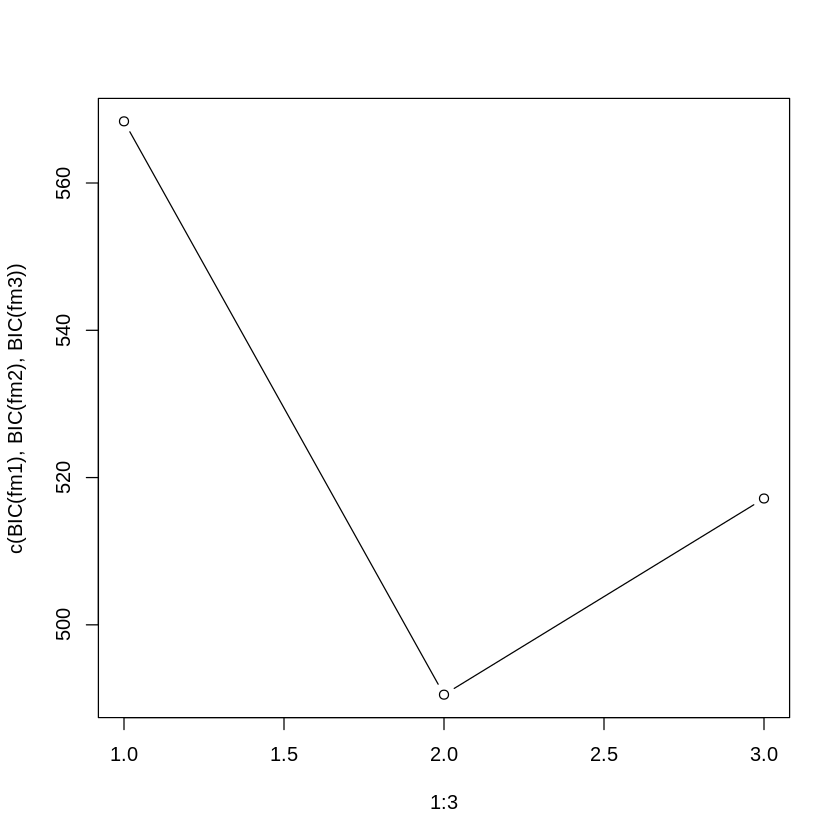

In [ ]:
#install.packages("depmixS4")
library("depmixS4")
set.seed(3)
y1 <- rpois(50,5)
y2 <- rpois(50,10)
ydf <- data.frame(y=c(y1,y2))
#Model specification 
m <- depmix(y~1,ns=2,family=poisson(),data=ydf, 
            instart=c(1,0), trstart=c(.8,.2,0,1),
            respstart=c(.5,.95))
m
fm <- fit(m,em=em.control(maxit=500))
summary(fm)

# fit models with 1 to 3 states
m1 <- depmix(y~1,ns=1,family=poisson(),data=ydf)
set.seed(1)
fm1 <- fit(m1, em=em.control(maxit=500))
m2 <- depmix(y~1,ns=2,family=poisson(),data=ydf)
set.seed(1)
fm2 <- fit(m2, em=em.control(maxit=500))
m3 <- depmix(y~1,ns=3,family=poisson(),data=ydf)
set.seed(1)
fm3 <- fit(m3,em=em.control(maxit=500))
# plot the BICs to select the proper model
plot(1:3,c(BIC(fm1),BIC(fm2),BIC(fm3)),ty="b")


### Bayesian Estimation
In the Bayesian framework, model estimation consists of determining the posterior distribution over the model parameters. Let $p\left(\theta\right)$ the prior distribution over model parameters, the posterior distribution is:
$$p\left(\theta|y_{1:T}\right)=\frac{f\left(y_{1:T}|\theta\right)p\left(\theta\right)}{\int f\left(y_{1:T}|\theta\right)p\left(\theta\right) d\theta}$$
For non-trivial models, this posterior distribution can not be calculated analytically, and hence numerical approximation has to be used. This is generally done through sampling with a Markov Chain Monte Carlo (MCMC) procedure such as Metropolis-Hastings or Gibbs sampling. 

In [ ]:
#### Markov Chain Monte Carlo (MCMC)


#### Sampling States and Model Parameters
We use MCMC to sample from the joint posterior distribution of parameters $\theta$ and hidden states $S_{1:T}$:
$$p\left(\theta, S_{1:T}|y_{1:T}\right)\propto p\left(y_{1:T}|\theta, S_{1:T}\right) p\left( S_{1:T}|\theta\right)p\left(\theta\right)$$

It efficient to use a multi-move sampling scheme, sampling the entire state sequence $S_{1:T}$ from the conditional distribution $p\left(S_{1:T}|\theta, y_{1:T}\right)$. So at the step $i$:
1. The hidden state sequence sampled at the previous step from $\tilde{s}_{1:T}^{(i-1)} \sim p\left(S_{1:T}|\theta^{(i-1)}, y_{1:T}\right)$. 
2. The model parameters are sampled from $\tilde{\theta}^{(i)} \sim p\left(\theta|\tilde{s}_{1:T}^{(i-1)}, y_{1:T}\right)$. 

The hidden sequence $S_{1:T}$ can be simulated sequentially starting with $S_{T}$ and proceeding backward in time to sample $S_{T-1},...., S_{1}$.

First, 
$$P\left(S_{T}|\theta, y_{1:T}\right) \sim P\left(S_{T}, y_{1:T}| \theta\right)=\alpha_{T}$$.

Secondly, 
$$P\left(S_{t}=i|S_{t+1}=j, \theta, y_{1:t}\right)=\frac{P\left(S_{t}=i,S_{t+1}=j| \theta, y_{1:t}\right)}{P\left(S_{t+1}=j| \theta, y_{1:t}\right)} $$
$$=\frac{P\left(S_{t+1}=j| S_{t}=i\right)P\left(S_{t}=i|\theta, y_{1:t}\right)}{\sum_{k=1}^{N}P\left(S_{t+1}=j| S_{t}=k\right)P\left(S_{t}=k|\theta, y_{1:t}\right)}= \frac{a_{ij}\tilde{\alpha}_{t}(i)}{\sum_{k=1}^{N}a_{kj}\tilde{\alpha}_{t}(k)}.$$

#### Forward-Filtering-Backwards-Sampling (FFBS) for HMM
Start with an initial state allocation $\tilde{s}_{1:T}^{0}$ and let $A_{.,j}$ denote the $j-th$ column of the transition matrix.
For $i=1,...:$
1. Sample $\tilde{\pi}^{(i)} \sim p\left(\pi|\tilde{s}_{1:T}^{(i-1)}\right)$.
2. Sample $\tilde{A}^{(i)} \sim p\left(A|\tilde{s}_{1:T}^{(i-1)}\right)$.
3. Sample $\tilde{\theta}_{obs}^{(i)} \sim p\left(\theta_{obs}|\tilde{s}_{1:T}^{(i-1)}, y_{1:T}\right)$.
4. Run forward-backward algorithm to obtain $\alpha_{t}(j)$, $t=1,...,T$, $j=1,...,N$.
5. Sample $\tilde{s}_{T}^{(i)} \propto \alpha_{T}$. 
6. For $t=T-1, ..., 1$:
      Sample $\tilde{s}_{t}^{(i)} \propto \tilde{A}_{.,\tilde{s}_{t+1}}^{(i)}\alpha_{t}(.)$
    


#### Conjugate prior 

In the Bayesian theory, when the prior and posterior distributions belong to the same probability distribution family they are then called $\textbf{conjugate distributions}$. 

#### Gamma distribution 
The gamma distribution is parameterized in terms of a shape parameter $\alpha$ and scale parameter $\theta$ (or with the inverse scale parameter $\beta=1/\theta$). The probability density function is given by
$$f\left(x; k, \theta\right)=\frac{x^{\alpha-1}e^{-\beta x} \beta^{\alpha}}{\Gamma(\alpha)}, x>0, \, \alpha,\beta>0$$

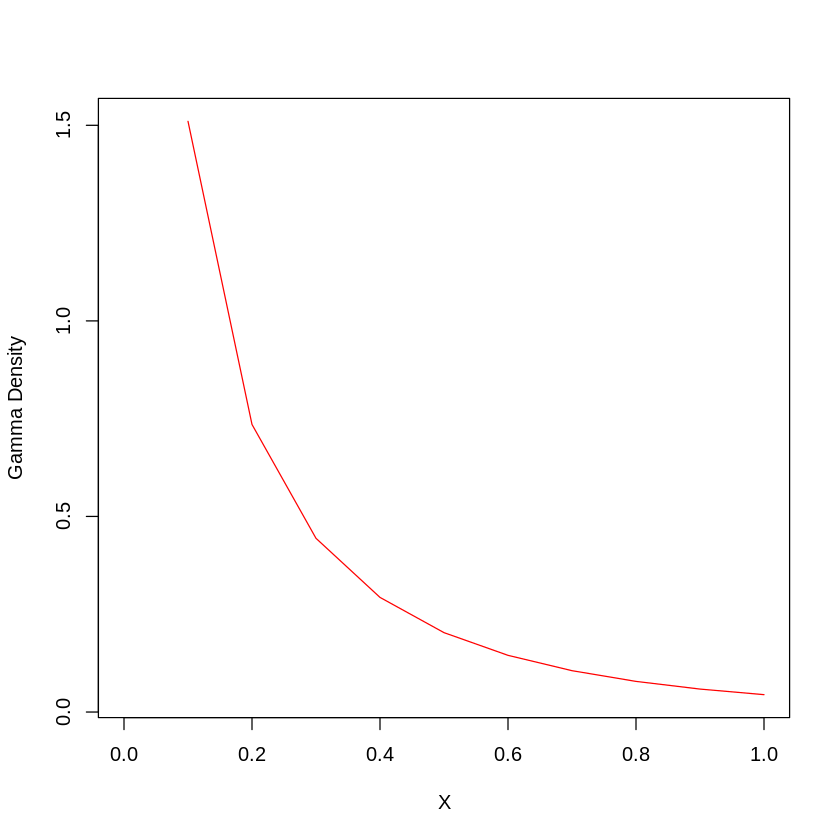

In [ ]:
seq = seq(0,1, by=0.1)
plot(seq, dgamma(seq, 0.25,2), xlab = "X",
     ylab = "Gamma Density", type = "l",
     col = "Red")


#### Beta distribution 
The probability density of beta distribution, for $0\geq x\geq 1$ and shape parameters $\alpha>0$ and $\beta>0$, is given by:
$$d\left(x; \alpha, \beta\right)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}$$


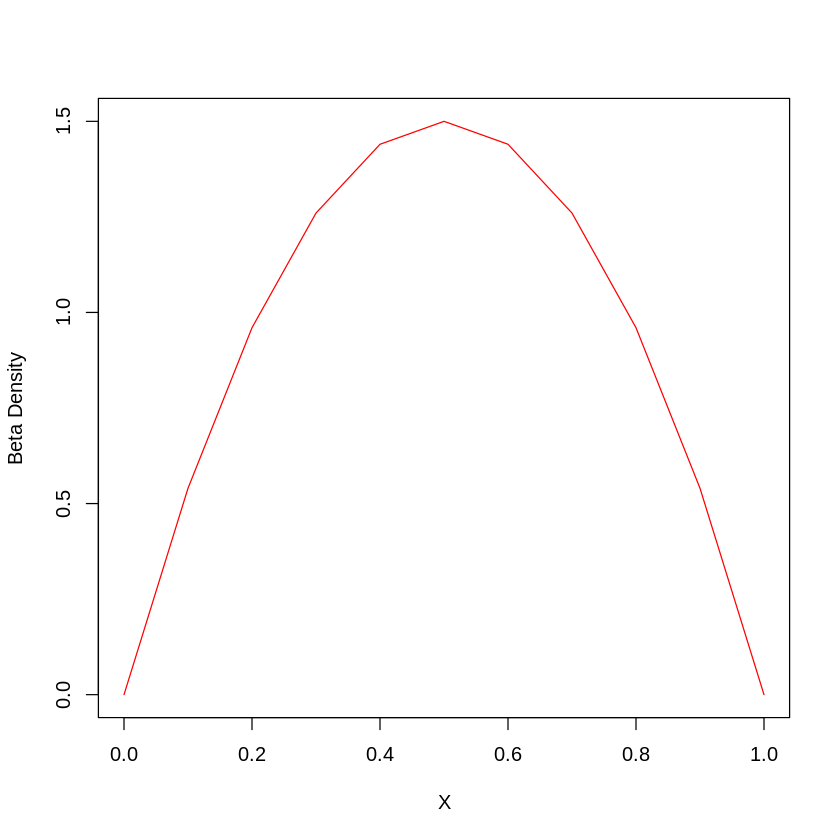

In [ ]:
plot(seq, dbeta(seq, 2,2), xlab = "X",
     ylab = "Beta Density", type = "l",
     col = "Red")

####  Dirichlet distribution 
The Dirichlet distribution of order $N \geq 2$ with parameters $\alpha_{1},...,\alpha_{N}$ satisfy the following probability density function: 
$$f\left(x_{1},..., x_{N};\alpha_{1},...,\alpha_{N} \right)=\frac{1}{B(\alpha)}\prod_{i=1}^{N}x_{i}^{\alpha_{i}-1}$$
where $\sum_{i=1}^{N}x_{i}=1$ and $x_{i} \in [0,1], \, \forall i \in {1,...,N} $ and $B(\alpha)$ is gamma function:
$$B(\alpha)=\frac{\prod_{i=1}^{N}\Gamma(\alpha_{i})}{\Gamma(\sum_{i=1}^{N}\alpha_{i})}$$

In [ ]:
#install.packages("MCMCpack")
library(MCMCpack)
alpha = c(1,2,3)
x = rdirichlet(4, alpha)
x

0.346883636,0.1527041,0.5004123
0.004897285,0.4189946,0.5761081
0.234923798,0.3381199,0.4269563
0.107324882,0.3311098,0.5615653


#### Example 

$\textbf{Description}$
Speed data set is a bivariate series of response times and accuracy scores of a single participant switching between slow/accurate responding and fast guessing on a lexical decision task. The slow and accurate responding, and the fast guessing can be modelled using two states, with a switching regime between them. The dataset further contains a third variable called Pacc, representing the relative pay-off for accurate responding, which is on a scale of zero to one. The value of Pacc was varied during the experiment to induce the switching. This data set is a from participant A in experiment 1a from Dutilh et al (2011).

$\textbf{Format}$
A data frame with 439 observations on the following 4 variables.
1. rt a numeric vector of response times (log ms)
2. corr a numeric vector of accuracy scores (0/1)
3. Pacc a numeric vector of the pay-off for accuracy
4. prev a numeric vector of accuracy scores (0/1) on the previous trial

In [ ]:
library(depmixS4)
data(speed)
speed[1:5,]

Loading required package: nnet

Loading required package: Rsolnp

Loading required package: nlme



,rt,corr,Pacc,prev
,<dbl>,<fct>,<dbl>,<fct>
1,6.456770,cor,0,inc
2,5.602119,cor,0,cor
3,6.253829,inc,0,cor
4,5.451038,inc,0,inc
5,5.872118,inc,0,inc


We use conjugate prior 
$$A_{i,.} \sim \textbf{Dirichlet}\left(\alpha_{trans,i}\right)$$
For $\textbf{corr}$, we assume a Bernoulli distribution, and the conjugate distribution for the parameter of this distribution, $\phi_{i}=P\left(corr_{t}=1|S_{t}=i\right)$, is the Beta distribution:
$$\phi_{i} \sim \textbf{Beta}\left(\alpha_{obs,i}, \beta_{obs,i}\right)$$ 
For the $\textbf{log RT}$, we assume a Normal distribution. The conjugate distribution for the parameters of this distribution, is the Normal-inverse-Gamma distribution:
$$\sigma_{i}^{-2} \sim \textbf{Gamma}\left(g_{0}, G_{0}\right)$$
$$\mu_{i} \sim \textbf{Normal}\left(m_{0}, M_{0}\right)$$

Let
$$n_{i}\left(S_{1:T}\right)=\sum_{t=1}^{T}\boldsymbol{\mathbb{1}}(s_{t}=i)$$
$$\textbf{n}\left(s_{1:T}\right)=\left(n_{1}\left(S_{1:T}\right), ...., n_{N}\left(S_{1:T}\right)\right)$$
$$n_{ij}\left(S_{1:T}\right)=\sum_{t=1}^{T}\boldsymbol{\mathbb{1}}(s_{t-1}=i, s_{t}=j)$$
$$\textbf{n}_{i.}\left(s_{1:T}\right)=\left(n_{i1}\left(S_{1:T}\right), ...., n_{iN}\left(S_{1:T}\right)\right)$$
Let $\phi_{-i}$ denote the vector containing all parameters $\phi_{j}$ ,$j\neq i$ , and similarly for $\mu_{-i}$ and $\sigma_{-i}$ . The posterior distributions are:

$$A_{i.}|s_{1:T}, y_{1:T}, \pi, \theta_{obs} \sim \textbf{Dirichlet}\left(\alpha_{trans,i}+n_{i.}(s_{1:T})\right)$$
$$\phi_{i}|s_{1:T}, y_{1:T}, \pi, A, \phi_{-i}, \mu, \sigma \sim \textbf{Beta}\left(\alpha_{obs,i}+n_{i, corr}(s_{1:T}), \beta_{obs,i}+n_{i, incorr}(s_{1:T})\right)$$
$$\sigma_{i}^{-2} |s_{1:T}, y_{1:T}, \pi, A, \phi, \mu, \sigma_{-i}  \sim \textbf{Gamma}\left(g_{i}, G_{i}\right)$$
$$\mu_{i}|s_{1:T}, y_{1:T}, \pi, A, \mu_{-i}, \sigma \sim \textbf{Normal}\left(m_{i}, M_{i}\right)$$

with 
$$g_{i}=g_{0}+\frac{1}{2} n_{i}\left(S_{1:T}\right)$$
$$G_{i}=G_{0}+\frac{1}{2}\sum_{t:s_{t}=i} \left(y_{t}-\mu_{i})\right)^{2}$$
$$m_{i}=\frac{m_{0}\sigma_{i}^{2}+M_{0}^{2}\sum_{t:s_{t}=i}y_{t}}{\sigma_{i}^{2}+M_{0}^{2}n_{i}(s_{1:T})}$$
$$M_{i}=\frac{\sigma_{i}^{2}M_{0}^{2}}{\sigma_{i}^{2}+M_{0}^{2}n_{i}(s_{1:T})}$$
$$n_{i, corr} (s_{1:T})=\sum_{t=1}^{T} \boldsymbol{\mathbb{1}}(S_{t}=i, corr_{t}=1) $$
$$n_{i, incorr} (s_{1:T})=\sum_{t=1}^{T} \boldsymbol{\mathbb{1}}(S_{t}=i, corr_{t} \neq 1) $$


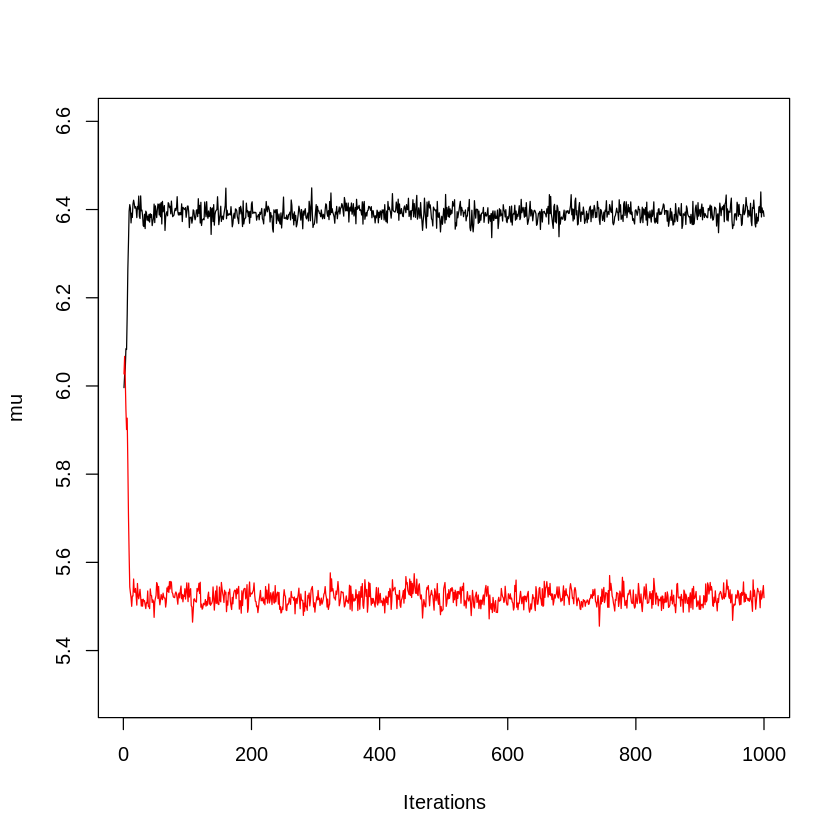

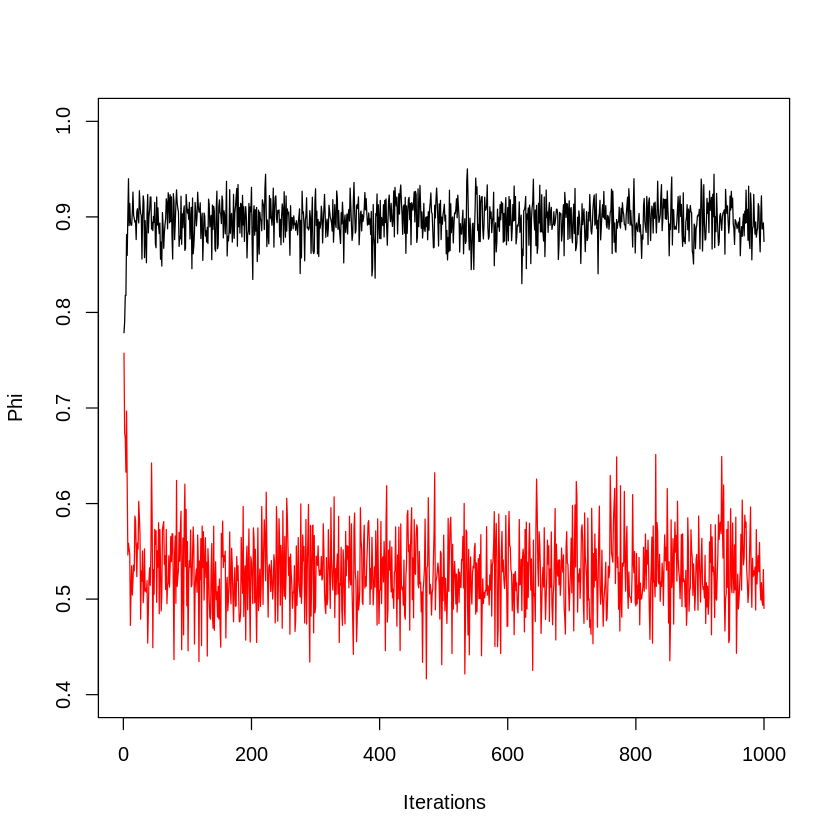

In [ ]:
library("depmixS4")
library("hmmr")
data(speed)
set.seed(4)
#We assume that data is single time series
hyperPars <- list(norm_invsigma_scale=.01,
                  norm_invsigma_shape=.01,norm_mu_sca=.01)
mcmc_samples <- list()
for(i in 1:4) {
  mcmc_samples[[i]] <- FFBS_BinomialNormal(speed$corr,
  speed$rt, nstates=2,
  #ntimes=c(168,134,137),
  niter=1000, hyperPars = hyperPars)
}

plot(mcmc_samples[[1]]$mu[,1], type="l", ylim=c(5.3, 6.6), xlab="Iterations", ylab="mu")
lines(mcmc_samples[[1]]$mu[,2],col="red", type="l")
plot(mcmc_samples[[1]]$pcor[,1], type="l", ylim=c(0.4, 1), xlab="Iterations", ylab="Phi")
lines(mcmc_samples[[1]]$pcor[,2],col="red", type="l")

## Reference 
See the book: $\textbf{Mixture and Hidden Markov Models with R}$ by Ingmar Visser Maarten Speekenbrink for more details.